<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module2/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [3]:
df.head()
print(df.isna().sum())

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


# Завдання 1
Вмведіть основні числові характеристики для числових ознак

In [4]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [5]:
# the case column - is index from csv file
df = pd.read_csv(
    "https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv",
    index_col='case'
)
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0


# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


<Axes: >

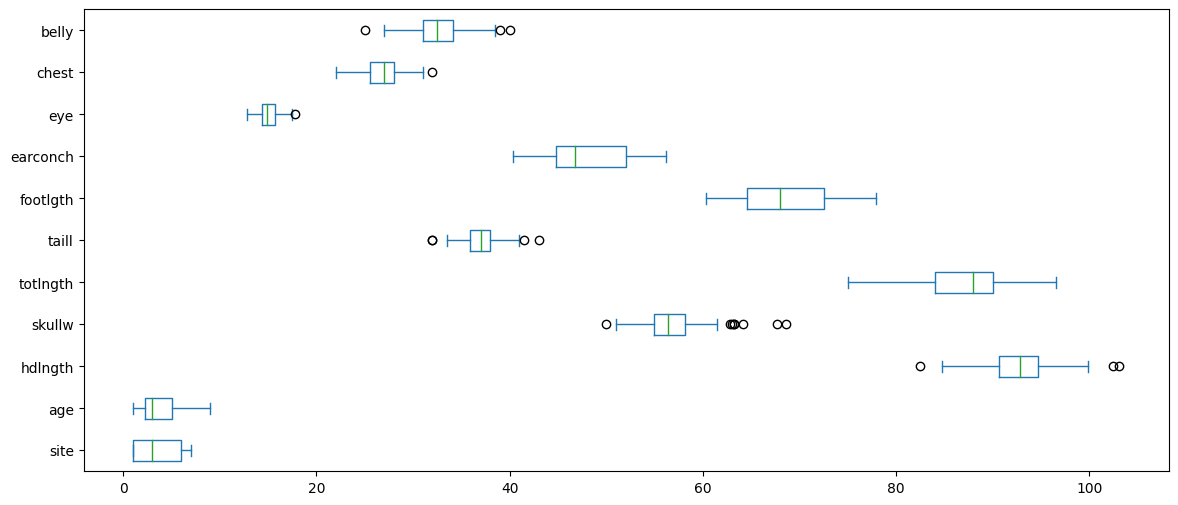

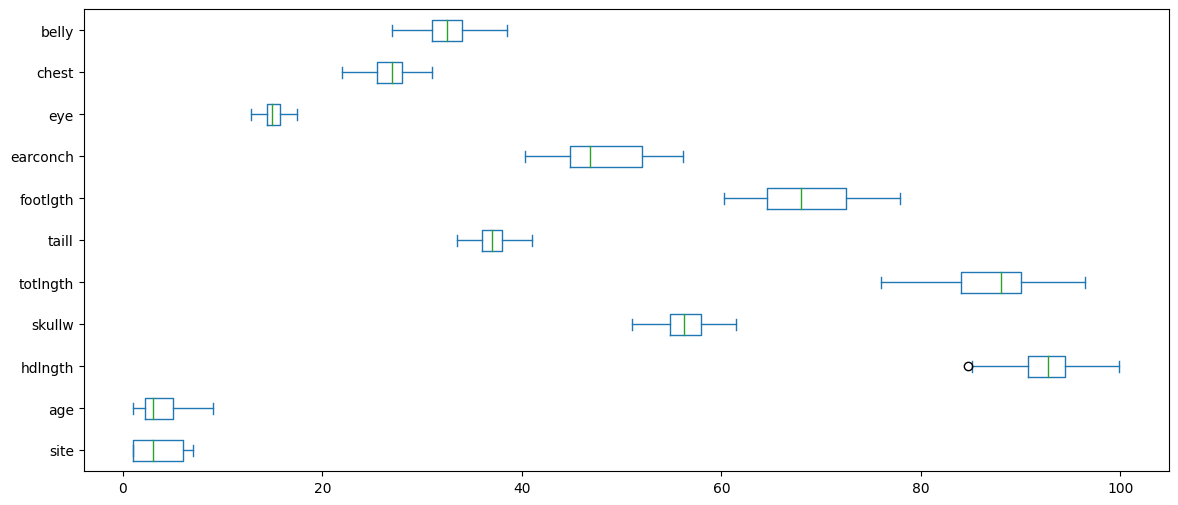

In [6]:
# show outliers
df.info()
df.plot(kind='box', vert=False, figsize=(14,6))
df_numeric = df.select_dtypes(exclude=['object'])

q1 = df_numeric.quantile(0.25)
q3 = df_numeric.quantile(0.75)

IQR = q3-q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

filter = ((df_numeric < upper_bound) & (df_numeric > lower_bound))
# filter = ((df < upper_bound) & (df > lower_bound))

df_cleaned = df_numeric[filter]
# df_cleaned = df[filter]

df_cleaned.plot(kind='box', vert=False, figsize=(14,6))

# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

<Axes: xlabel='chest', ylabel='belly'>

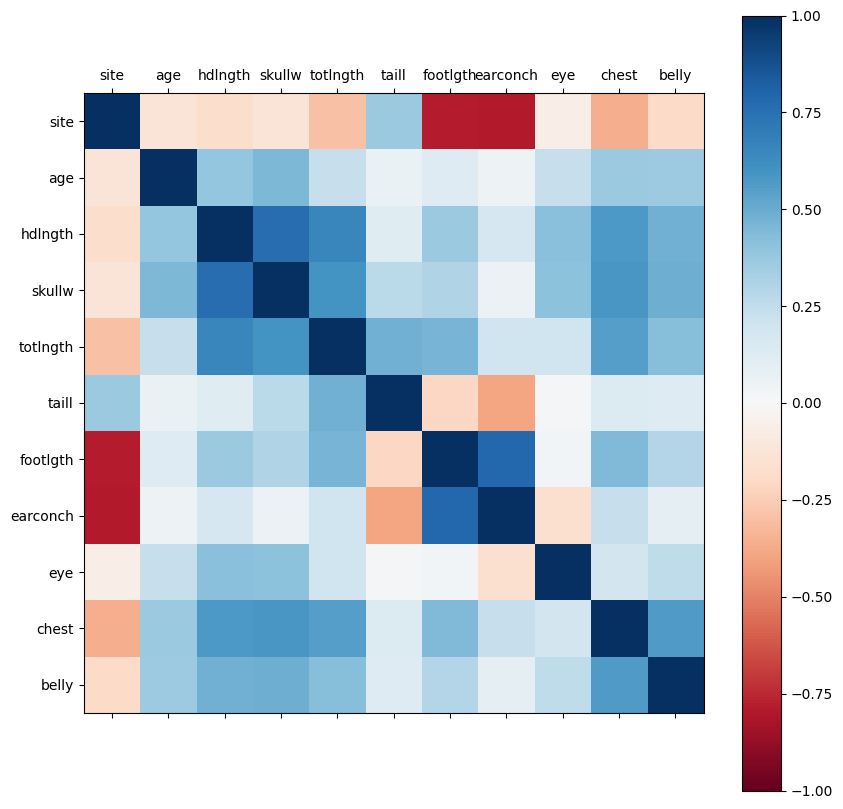

<Figure size 1000x1000 with 0 Axes>

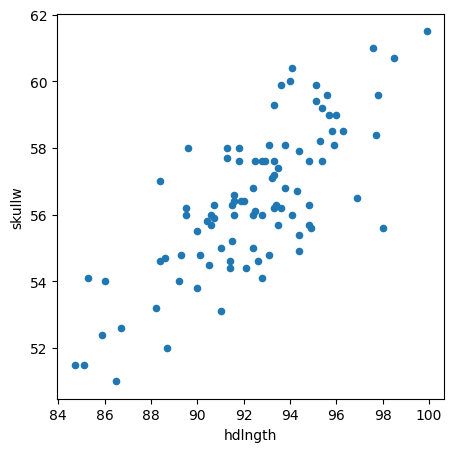

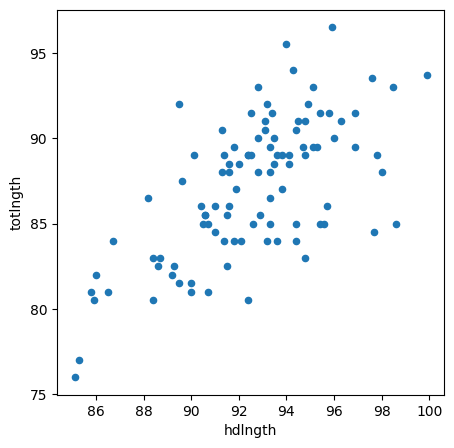

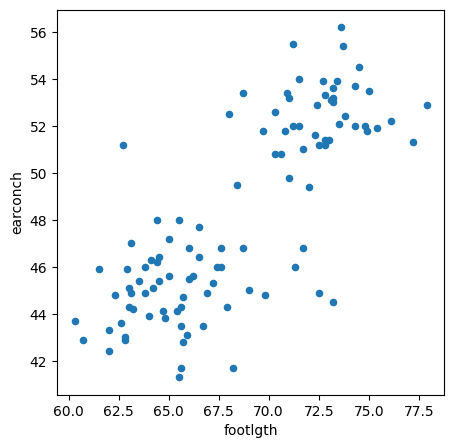

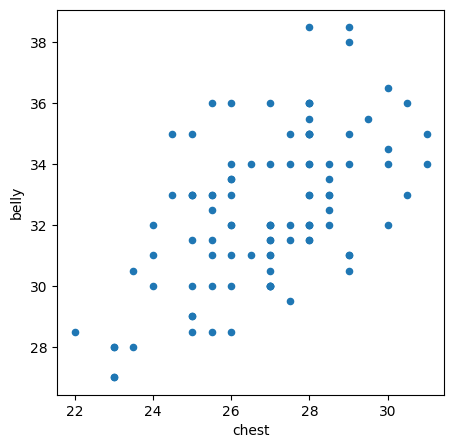

In [7]:
corr = df_cleaned.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.colorbar()
plt.clim(-1,1)

fig = plt.figure(figsize=(10,10))
df_cleaned.plot(kind='scatter', x='hdlngth', y='skullw', figsize=(5,5))
df_cleaned.plot(kind='scatter', x='hdlngth', y='totlngth', figsize=(5,5))
df_cleaned.plot(kind='scatter', x='footlgth', y='earconch', figsize=(5,5))
df_cleaned.plot(kind='scatter', x='chest', y='belly', figsize=(5,5))

# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума

(85, 13)
site        0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
Pop         0
sex         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 87
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      85 non-null     int64  
 1   age       85 non-null     float64
 2   hdlngth   85 non-null     float64
 3   skullw    85 non-null     float64
 4   totlngth  85 non-null     float64
 5   taill     85 non-null     float64
 6   footlgth  85 non-null     float64
 7   earconch  85 non-null     float64
 8   eye       85 non-null     float64
 9   chest     85 non-null     float64
 10  belly     85 non-null     float64
 11  Pop       85 non-null     object 
 12  sex       85 non-null     object 
dtypes: float64(10), int64(1), object(2)
memory usage: 9.3+ KB
None


<Axes: >

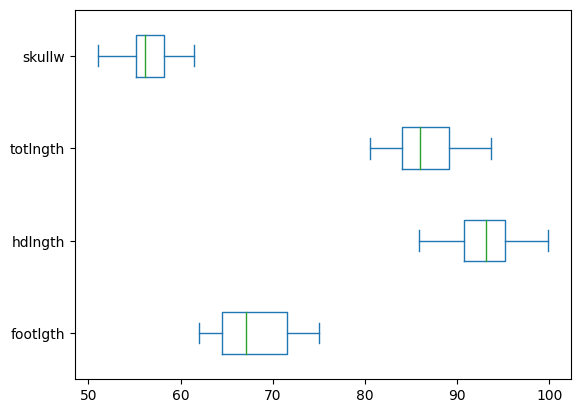

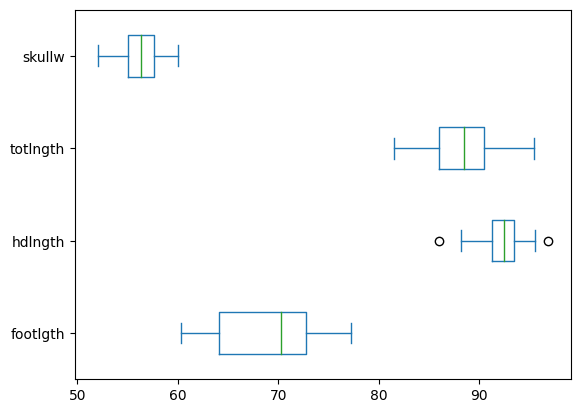

In [8]:
# merge cleaned df with original df to return object categories
df = pd.merge(df_cleaned,df)
df.dropna(inplace = True)
print(df.shape)
print(df.isna().sum())
print(df.info())

df_male = df[df['sex'] == 'm']
df_female = df[df['sex'] == 'f']


columns_to_plot = ['footlgth','hdlngth','totlngth','skullw']
df_male[columns_to_plot].plot(kind='box', vert=False)
df_female[columns_to_plot].plot(kind='box', vert=False)


# print(df_cleaned.shape)
# print(df_cleaned.isna().sum())
# print()
# print(df.shape)
# print(df.isna().sum())
# print(df[df.isna().any(axis=1)])
# print()
# df_res = pd.merge(df_cleaned, df)
# print(df_res.shape)
# print(df_res.isna().sum())